### Instalación de requerimientos, se utilizó la versión de Python 3.8.6

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\sebas\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp38-none-win_amd64.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\sebas\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install statsmodels

You should consider upgrading via the 'C:\Users\sebas\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.



In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as graph
import statsmodels.formula.api as smf
from scipy import stats

dataset = pd.read_csv('Data/chocolate data.txt', index_col=False, sep="\t",header=0)

print(dataset.head())

   weight  cocoa_percent  sugar_percent  milk_percent  customer_happiness
0     185             65             11            24                  47
1     247             44             34            22                  55
2     133             33             21            47                  35
3     145             30             38            32                  34
4     110             22             70             7                  40


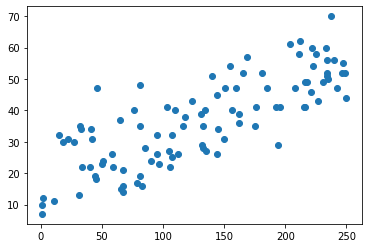

In [6]:
#Análisis peso - felicidad del cliente
x = dataset['weight']
y = dataset['customer_happiness']

graph.scatter(x,y)
graph.show()

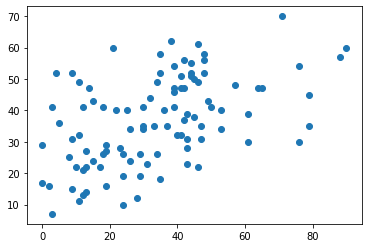

In [7]:
#Análisis pocentaje de cocoa - felicidad del cliente 
x = dataset['cocoa_percent']
y = dataset['customer_happiness']

graph.scatter(x,y)
graph.show()

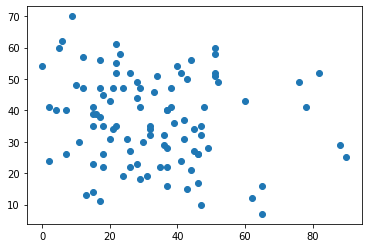

In [8]:
#Análisis porcentaje de leche - felicidad del cliente 
x = dataset['milk_percent']
y = dataset['customer_happiness']

graph.scatter(x,y)
graph.show()

In [9]:
# Run this cell!

# DO NOT EDIT ANY OF THIS CODE

# Define a function to perform a linear regression
def PerformLinearRegression(formula):

    # This performs linear regression
    lm = smf.ols(formula = formula, data = dataset).fit()

    featureName=formula.split(" ")[-1]
    
    # get the data for the x parameter (our feature)
    train_X=dataset[featureName]
    
    # This makes and shows a graph
    intercept=lm.params[0]
    slope=lm.params[1]
    line = slope * train_X + intercept
    graph.plot(train_X, line, '-', c = 'red')
    graph.scatter(train_X, dataset.customer_happiness)
    graph.ylabel('customer_happiness')
    graph.xlabel(featureName)
    graph.show()

    # Para la predicción
    return lm

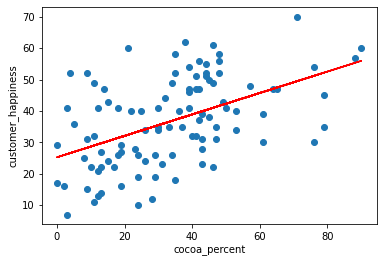

In [10]:
# This performs the linear regression steps listed above
# The text in red is the formula for our regression
PerformLinearRegression('customer_happiness ~ cocoa_percent')

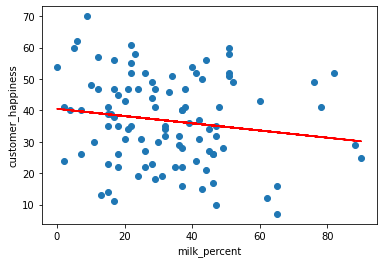

In [12]:
PerformLinearRegression('customer_happiness ~ milk_percent')

### Menos dispersión en la siguiente gráfica

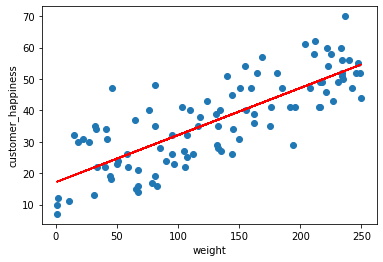

In [13]:
PerformLinearRegression('customer_happiness ~ weight')

### Para hacer una predicción

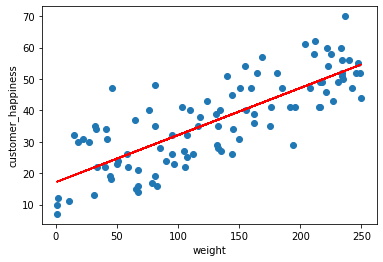

In [14]:
lm = PerformLinearRegression('customer_happiness ~ weight')

In [15]:
b = lm.params[0]
m = lm.params[1]

y = m * 350 + b 
print(b)

17.096017620806858
